In [2]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt

# heart beating signals
record = wfdb.rdrecord('100', pn_dir='mitdb')  # '100'은 샘플 이름
signal = record.p_signal[:,0]  # 첫 채널만 사용

# Conv1D
signal = signal.astype(np.float32)
signal = np.expand_dims(signal, axis=-1)  # shape: (length, 1)


(650000, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

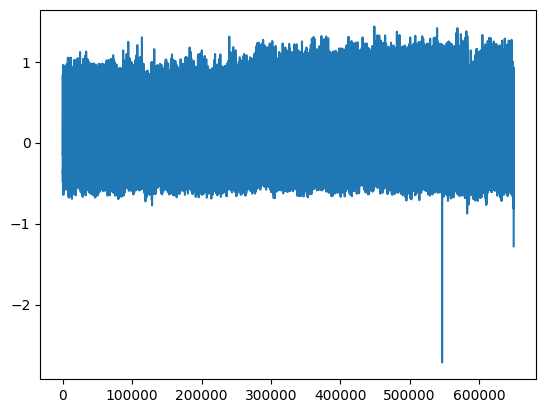

In [28]:
print(signal.shape)

plt.plot(signal)
plt.show


In [23]:
import torch

m = torch.nn.Conv1d(1, 8, 3)

In [38]:
x = torch.from_numpy(signal).T
output = m(x)
print(output)

tensor([[-0.0335, -0.0335, -0.0335,  ...,  0.1487,  0.2190,  0.3331],
        [ 0.1166,  0.1166,  0.1166,  ...,  0.0331,  0.0620,  0.0844],
        [-0.4062, -0.4062, -0.4062,  ..., -0.5438, -0.6978, -0.8061],
        ...,
        [ 0.1298,  0.1298,  0.1298,  ...,  0.5122,  0.8241,  1.2135],
        [-0.3212, -0.3212, -0.3212,  ..., -0.0117,  0.1127,  0.3597],
        [ 0.3961,  0.3961,  0.3961,  ...,  0.4496,  0.6176,  0.7064]],
       grad_fn=<SqueezeBackward1>)


In [41]:
y = output.detach().numpy()
print(y.shape)

(8, 649998)


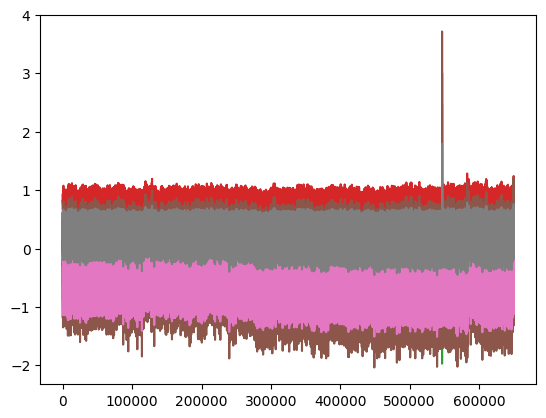

In [40]:
plt.plot(y.T)
plt.show()

In [42]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import os
import wfdb

data_dir = '../data/mitdb'
record_names = [f[:-4] for f in os.listdir(data_dir) if f.endswith('.dat')]

signals = []
for rec in record_names:
    record = wfdb.rdrecord(f'{data_dir}/{rec}')
    signals.append(record.p_signal)